In [12]:
!unzip '/content/Car damage-20221018T105344Z-001.zip'

Archive:  /content/Car damage-20221018T105344Z-001.zip
  inflating: Car damage/body/validation/02-side/0015.JPEG  
  inflating: Car damage/body/validation/02-side/0031.JPEG  
  inflating: Car damage/body/validation/02-side/0013.jpeg  
  inflating: Car damage/body/validation/02-side/0039.JPEG  
  inflating: Car damage/body/validation/02-side/0048.jpeg  
  inflating: Car damage/body/validation/02-side/0034.JPEG  
  inflating: Car damage/body/validation/02-side/0030.jpeg  
  inflating: Car damage/body/validation/02-side/0044.JPEG  
  inflating: Car damage/body/validation/02-side/0047.JPEG  
  inflating: Car damage/body/validation/02-side/0035.JPEG  
  inflating: Car damage/body/validation/02-side/0014.JPEG  
  inflating: Car damage/body/validation/02-side/0024.JPEG  
  inflating: Car damage/body/validation/02-side/0028.JPEG  
  inflating: Car damage/body/validation/02-side/0036.JPEG  
  inflating: Car damage/body/validation/02-side/0016.JPEG  
  inflating: Car damage/body/validation/02-si

In [13]:
# Import required lib
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
# Creating augmentation on training variable
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [15]:
# Creating augmentation on testing variable

test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
# Passing training data to train variable for body

xtrain = train_datagen.flow_from_directory('/content/Car damage/body/training',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 979 images belonging to 3 classes.


In [17]:
# Passing testing data to test variable for body

xtest = test_datagen.flow_from_directory('/content/Car damage/body/validation',
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

Found 171 images belonging to 3 classes.


IMPORT THE MODEL BUILDING LIBRARIES

In [18]:
# Importing required lib

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [19]:
# Creating CNN block

model = Sequential() #initializing or loading the model
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
# Fully connected layers (ANN)
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(150,activation='relu')) # Hidden layer 2
model.add(Dense(3,activation='softmax')) # Output layer


In [20]:
# Compile the model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
# Train model

model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=10,
                    validation_data=xtest,
                    validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
10/10 [==============================] - 10s 233ms/step - loss: 1.1630 - accuracy: 0.3453 - val_loss: 0.6767 - val_accuracy: 0.2807
Epoch 2/10
10/10 [==============================] - 2s 219ms/step - loss: 0.6386 - accuracy: 0.4311 - val_loss: 0.6336 - val_accuracy: 0.4269
Epoch 3/10
10/10 [==============================] - 2s 223ms/step - loss: 0.6290 - accuracy: 0.4280 - val_loss: 0.6286 - val_accuracy: 0.4386
Epoch 4/10
10/10 [==============================] - 2s 218ms/step - loss: 0.6239 - accuracy: 0.4372 - val_loss: 0.6339 - val_accuracy: 0.4269
Epoch 5/10
10/10 [==============================] - 2s 220ms/step - loss: 0.6269 - accuracy: 0.4147 - val_loss: 0.6169 - val_accuracy: 0.4327
Epoch 6/10
10/10 [==============================] - 2s 216ms/step - loss: 0.6139 - accuracy: 0.4474 - val_loss: 0.6134 - val_accuracy: 0.4444
Epoch 7/10
10/10 [==============================] - 2s 216ms/step - loss: 0.6038 - accuracy: 0.4740 - val_loss: 0.6049 - val_accuracy: 0.4561
Epoch

In [22]:
# Saving model

model.save('cars.h5')

TESTING THE MODEL

In [23]:
# Importing req lib

import numpy as np
from tensorflow.keras.preprocessing import image

In [24]:
# Reading the image

img = image.load_img('/content/Car damage/body/validation/00-front/0011.JPEG',target_size=(64,64))

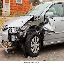

In [25]:
# Visualize the image

img

In [26]:
# Converting image to array

x = image.img_to_array(img)
x

array([[[127., 105.,  82.],
        [ 49.,  17.,   0.],
        [ 70.,  25.,  19.],
        ...,
        [228., 204., 176.],
        [234., 213., 184.],
        [226., 207., 177.]],

       [[131., 109.,  85.],
        [145., 113.,  92.],
        [ 71.,  27.,  18.],
        ...,
        [230., 227., 222.],
        [238., 237., 232.],
        [231., 230., 225.]],

       [[101.,  81.,  54.],
        [142., 112.,  88.],
        [ 76.,  33.,  24.],
        ...,
        [112., 116., 119.],
        [148., 149., 153.],
        [179., 178., 183.]],

       ...,

       [[255., 253., 248.],
        [255., 253., 248.],
        [255., 252., 247.],
        ...,
        [255., 254., 248.],
        [255., 254., 248.],
        [255., 254., 248.]],

       [[254., 252., 253.],
        [255., 254., 255.],
        [255., 254., 255.],
        ...,
        [254., 254., 254.],
        [251., 251., 251.],
        [253., 253., 253.]],

       [[254., 255., 255.],
        [254., 255., 255.],
        [254., 2

In [27]:
# Expanding dimensions

x = np.expand_dims(x,axis=0)
x

array([[[[127., 105.,  82.],
         [ 49.,  17.,   0.],
         [ 70.,  25.,  19.],
         ...,
         [228., 204., 176.],
         [234., 213., 184.],
         [226., 207., 177.]],

        [[131., 109.,  85.],
         [145., 113.,  92.],
         [ 71.,  27.,  18.],
         ...,
         [230., 227., 222.],
         [238., 237., 232.],
         [231., 230., 225.]],

        [[101.,  81.,  54.],
         [142., 112.,  88.],
         [ 76.,  33.,  24.],
         ...,
         [112., 116., 119.],
         [148., 149., 153.],
         [179., 178., 183.]],

        ...,

        [[255., 253., 248.],
         [255., 253., 248.],
         [255., 252., 247.],
         ...,
         [255., 254., 248.],
         [255., 254., 248.],
         [255., 254., 248.]],

        [[254., 252., 253.],
         [255., 254., 255.],
         [255., 254., 255.],
         ...,
         [254., 254., 254.],
         [251., 251., 251.],
         [253., 253., 253.]],

        [[254., 255., 255.],
       

In [28]:
# Predicting side

model.predict(x)

1/1 [==============================] - 0s 121ms/step


array([[1., 0., 0.]], dtype=float32)

In [29]:
# For visualizing class index

xtrain.class_indices

{'00-front': 0, '01-rear': 1, '02-side': 2}

In [34]:
# Predicting and index matching

op = ['front','rear','side']
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 17ms/step


'front'

In [35]:
# Testing

img = image.load_img('/content/Car damage/body/validation/01-rear/0012.JPEG',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 15ms/step


'front'

MODEL TUNING

In [36]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [37]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                        patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                        patience=5,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]

In [38]:
# Train model

model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=100,
                    callbacks=callback,
                    validation_data=xtest,
                    validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
10/10 [==============================] - 3s 306ms/step - loss: 0.5697 - accuracy: 0.5220 - val_loss: 0.5979 - val_accuracy: 0.5088 - lr: 0.0010
Epoch 2/100
10/10 [==============================] - 2s 225ms/step - loss: 0.5618 - accuracy: 0.5485 - val_loss: 0.6001 - val_accuracy: 0.5029 - lr: 0.0010
Epoch 3/100
10/10 [==============================] - 2s 219ms/step - loss: 0.5512 - accuracy: 0.5659 - val_loss: 0.6066 - val_accuracy: 0.4971 - lr: 0.0010
Epoch 4/100
10/10 [==============================] - 2s 222ms/step - loss: 0.5345 - accuracy: 0.6016 - val_loss: 0.6023 - val_accuracy: 0.5322 - lr: 0.0010
Epoch 5/100
10/10 [==============================] - 2s 227ms/step - loss: 0.5232 - accuracy: 0.6047 - val_loss: 0.6051 - val_accuracy: 0.5146 - lr: 0.0010
Epoch 6/100
10/10 [==============================] - 2s 220ms/step - loss: 0.5210 - accuracy: 0.6006 - val_loss: 0.6099 - val_accuracy: 0.5205 - lr: 0.0010
Epoch 7/100
10/10 [==============================] - 2s 226ms/st

In [40]:
# Testing

img = image.load_img('/content/Car damage/body/training/02-side/0008.JPEG',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 16ms/step


'side'